# Workgroup 4

Authors: Valerie Dube, Erzo Garay, Juan Marcos Guerrero y Matias Villalba

## Bootstraping

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

## Data base

The data is not created randomly; it is extracted from the "penn_jae.dat" database. This database is imported and filtered so that the variable "tg" becomes "t4," which is a dummy variable identifying those treated with t4 versus individuals in the control group. Additionally, the logarithm of the variable "inuidur1" is created.

In [8]:
Penn = pd.read_csv(r'../../../data/penn_jae.csv')
Penn= Penn[(Penn['tg'] == 4) | (Penn['tg'] == 0)]
Penn.update(Penn[Penn['tg'] == 4][['tg']].replace(to_replace=4, value=1))
Penn.rename(columns={'tg': 't4'}, inplace=True)

In [42]:

Penn['dep1'] = (Penn['dep'] == 1).astype(int)
Penn['dep2'] = (Penn['dep'] == 2).astype(int)
Penn['log_inuidur1'] = np.log(Penn['inuidur1'])
Penn.drop('dep', axis=1, inplace=True)

    Unnamed: 0   abdt   t4  inuidur1  inuidur2  female  black  hispanic  \
0            1  10824  0.0        18        18       0      0         0   
3            4  10824  0.0         1         1       0      0         0   
4            5  10747  0.0        27        27       0      0         0   
11          12  10607  1.0         9         9       0      0         0   
12          13  10831  0.0        27        27       0      0         0   

    othrace  q1  ...  agelt35  agegt54  durable  nondurable  lusd  husd  muld  \
0         0   0  ...        0        0        0           0     0     1     0   
3         0   0  ...        0        0        0           0     1     0     0   
4         0   0  ...        0        0        0           0     1     0     0   
11        0   0  ...        1        0        0           0     0     0     1   
12        0   0  ...        0        1        1           0     1     0     0   

    dep1  dep2  log_inuidur1  
0      0     1      2.890372  


## Bootstrap function

A function is created with the specified linear regression "log(inuidur1)~t4+ (female+black+othrace+dep1+dep2+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)," which outputs information about the estimated coefficients (dep1 and dep2 are dummy variables created from dep; ultimately, it is the same as treating dep as a categorical variable).

In [120]:
def get_estimates(data,index):
    A = data[['t4','female', 'black', 'othrace', 'dep1', 'dep2', 'q2', 'q3', 'q4', 'q5', 'q6', 'agelt35', 'agegt54', 'durable', 'lusd', 'husd']]
    X= A.iloc[index] 
    B = Penn['log_inuidur1']
    y=B.iloc[index]
    
    lr = LinearRegression()
    lr.fit(X,y)
    intercept = lr.intercept_
    coef = lr.coef_
    return [intercept,coef]

def get_indices(data,num_samples):
    return  np.random.choice(np.arange(Penn.shape[0]), num_samples, replace=True)
n=len(Penn)

def boot(data,func,R):
    coeff_1 = []
    coeff_2 = []
    coeff_3 = []
    for i in range(R):
        coeff_1.append(func(data,get_indices(data,n))[1][0])
        coeff_2.append(func(data,get_indices(data,n))[1][1]) 
        coeff_3.append(func(data,get_indices(data,n))[1][2])
    coeff_1_statistics = {'estimated_value':np.mean(coeff_1),'std_error':np.std(coeff_1)}   
    coeff_2_statistics = {'estimated_value':np.mean(coeff_2),'std_error':np.std(coeff_2)}   
    coeff_3_statistics = {'estimated_value':np.mean(coeff_3),'std_error':np.std(coeff_3)}   
    return {'coeff_1_statistics':coeff_1_statistics,'coeff_2_statistics':coeff_2_statistics,'coeff_3_statistics':coeff_3_statistics}, coeff_1, coeff_2,coeff_3 


## Standard error

In [121]:
results = boot(Penn,get_estimates,1000)

print('Result for coefficient term t4 ',results[0]['coeff_1_statistics'])
print('Result for coefficient term female',results[0]['coeff_2_statistics'])
print('Result for coefficient term black',results[0]['coeff_3_statistics'])

Result for coefficient term t4  {'estimated_value': -0.06988404525587032, 'std_error': 0.03580097798905932}
Result for coefficient term female {'estimated_value': 0.12750195812651027, 'std_error': 0.03530038686565401}
Result for coefficient term black {'estimated_value': -0.2917027856008439, 'std_error': 0.06050929944267628}


In [129]:
data = {
    "Variable": ["t4", "female", "black"],
    "Estimate": [
        results[0]['coeff_1_statistics']['estimated_value'],
        results[0]['coeff_2_statistics']['estimated_value'],
        results[0]['coeff_3_statistics']['estimated_value']
    ],
    "Standard Error": [
        results[0]['coeff_1_statistics']['std_error'],
        results[0]['coeff_2_statistics']['std_error'],
        results[0]['coeff_3_statistics']['std_error']
    ]
}

df = pd.DataFrame(data)
print(df)


  Variable  Estimate  Standard Error
0       t4 -0.070467        0.036035
1   female  0.127009        0.035710
2    black -0.293443        0.059621


### t4 distribution

C:\Users\Erzo\AppData\Local\Temp\ipykernel_13076\562490230.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(results[1], bins=20)


Text(0.5, 1.0, "Histogram - t4's coefficient (Density)")

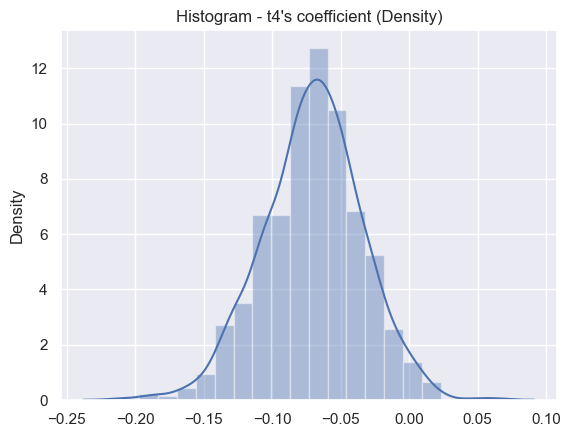

In [132]:
sns.set_theme()
ax = sns.distplot(results[1], bins=20)

plt.title("Histogram - t4's coefficient (Density)")

### Female distribution

C:\Users\Erzo\AppData\Local\Temp\ipykernel_13076\889737210.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(results[2], bins=20)


Text(0.5, 1.0, "Histogram - female's coefficient (Density)")

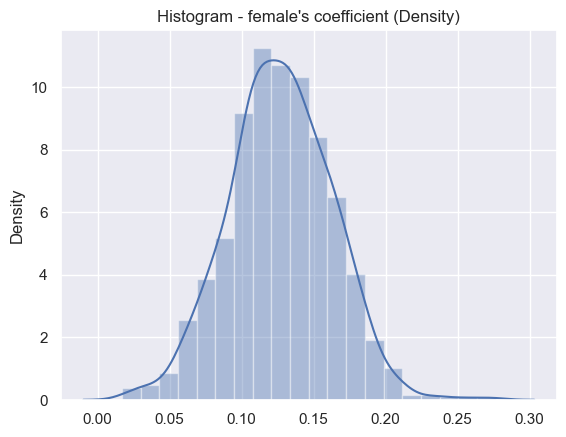

In [135]:
sns.set_theme()
ax = sns.distplot(results[2], bins=20)

plt.title("Histogram - female's coefficient (Density)")

###  Black distribution

C:\Users\Erzo\AppData\Local\Temp\ipykernel_13076\825763745.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(results[3], bins=20)


Text(0.5, 1.0, "Histogram - black's coefficient (Density)")

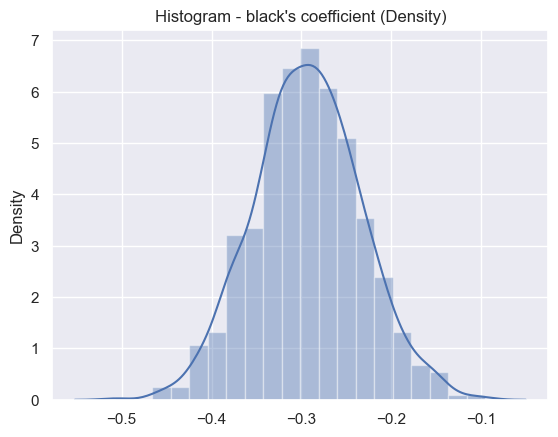

In [136]:
sns.set_theme()
ax = sns.distplot(results[3], bins=20)

plt.title("Histogram - black's coefficient (Density)")

## Causal Forest

In [101]:
# Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from econml.grf import CausalForest, RegressionForest

### 1. Preprocessing

In [102]:
# Import synthetic data from data folder
df = pd.read_csv("../../data/synthetic_data.csv")

In [103]:
df.head()

,schoolid,Z,Y,S3,C1,C2,C3,XC,X1,X2,X3,X4,X5
0,76,1,0.081602,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
1,76,1,-0.385869,4,12,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
2,76,1,0.398184,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
3,76,1,-0.175037,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
4,76,1,0.884583,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10391 entries, 0 to 10390
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   schoolid  10391 non-null  int64  
 1   Z         10391 non-null  int64  
 2   Y         10391 non-null  float64
 3   S3        10391 non-null  int64  
 4   C1        10391 non-null  int64  
 5   C2        10391 non-null  int64  
 6   C3        10391 non-null  int64  
 7   XC        10391 non-null  int64  
 8   X1        10391 non-null  float64
 9   X2        10391 non-null  float64
 10  X3        10391 non-null  float64
 11  X4        10391 non-null  float64
 12  X5        10391 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 1.0 MB


In [105]:
# Save school clusters in variable
school_id = df['schoolid'].astype('category').cat.codes

In [106]:
# Fit treatment (w) OLS
formula = 'Z ~ ' + ' + '.join(df.columns.drop(['Z', 'Y']))
w_lm = smf.glm(formula=formula, data=df, family=sm.families.Binomial()).fit()

# Print summary of the GLM model
print(w_lm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Z   No. Observations:                10391
Model:                            GLM   Df Residuals:                    10379
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6519.5
Date:                Tue, 04 Jun 2024   Deviance:                       13039.
Time:                        19:06:52   Pearson chi2:                 1.04e+04
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007280
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0758      0.146     -7.348      0.0

In the previous OLS, we can observe that only the ctudent’s self-reported expectations for success (S3), student gender (C2), student first-generation status (C3), and school-level mean of students’ fixed mindsets (X1) variables are significat

In [107]:
# We define W, Y, and X_raw
W = df['Z']
Y = df['Y']
X_raw = df.drop(columns=['schoolid', 'Z', 'Y']) # School ID does not affect pscore

In [108]:
# Create model matrices for categorical variables
C1_exp = pd.get_dummies(X_raw['C1'], prefix='C1')
XC_exp = pd.get_dummies(X_raw['XC'], prefix='XC')

In [109]:
# Combine these matrices with the rest of the data
X = pd.concat([X_raw.drop(columns=['C1', 'XC']), C1_exp, XC_exp], axis=1)

### 2. Estimation

#### 2.1. Cluster-Robust Random Forests

In this section, we grow a forest. We add extra trees for the causal forest.

First, we train a regression forest that can be used to estimate the conditional mean function mu(x) = E[Y | X = x]

In [110]:
regf = RegressionForest(max_depth=None, random_state=0, n_estimators=1000)

Y_hat = regf.fit(X, Y, sample_weight=school_id).predict(X)
W_hat = regf.fit(X, W, sample_weight=school_id).predict(X)

#### 2.2. Causal Forests for Observational Studies

In [111]:
cf_raw = CausalForest(max_depth=None, random_state=0, n_estimators=1000)

cf_raw.fit(X, Y, W, Y_hat, W_hat)

TypeError: CausalForest.fit() takes 4 positional arguments but 6 were given

**Q1: How the tree was built?**

Answer: ...